In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

In [3]:
df_final_demo = pd.read_csv("/Users/lewisclark/Downloads/df_final_demo.txt", delimiter=",")
df_final_exp = pd.read_csv("/Users/lewisclark/Downloads/df_final_experiment_clients.txt", delimiter=",")
df_final_web_pt1 = pd.read_csv("/Users/lewisclark/Downloads/df_final_web_data_pt_1.txt", delimiter=",")
df_final_web_pt2 = pd.read_csv("/Users/lewisclark/Downloads/df_final_web_data_pt_2.txt", delimiter=",")

In [4]:
df_final_web_data = pd.concat([df_final_web_pt1, df_final_web_pt2], ignore_index=True)
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_merged = df_final_demo.merge(df_final_exp, on="client_id", how="left")
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [6]:
df_merged.info(), df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


(None,
 client_id               0
 clnt_tenure_yr         14
 clnt_tenure_mnth       14
 clnt_age               15
 gendr                  14
 num_accts              14
 bal                    14
 calls_6_mnth           14
 logons_6_mnth          14
 Variation           20109
 dtype: int64)

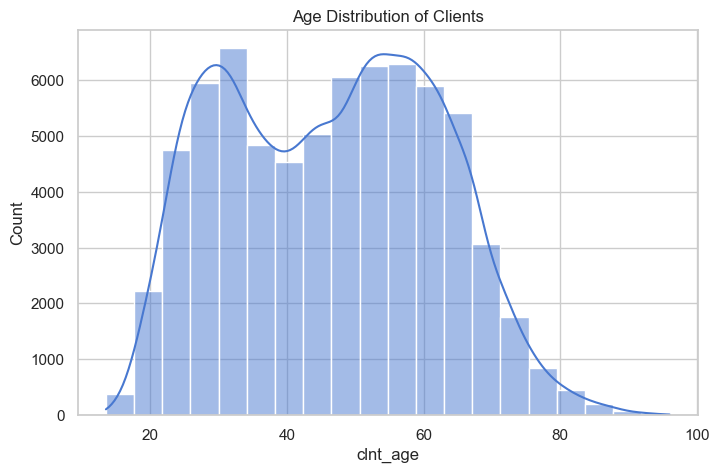

In [7]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df_merged["clnt_age"], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

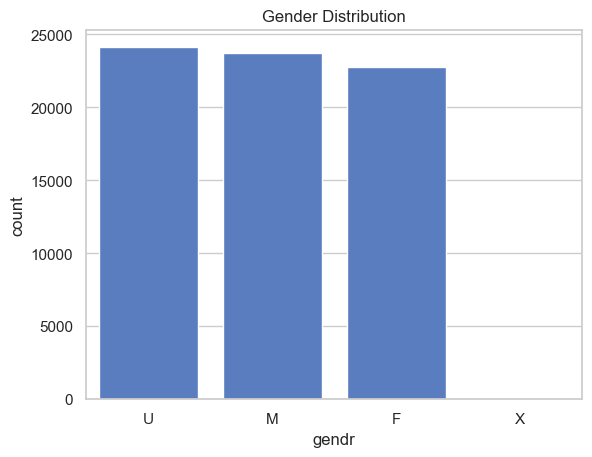

In [8]:
sns.countplot(data=df_merged, x="gendr")
plt.title("Gender Distribution")
plt.show()

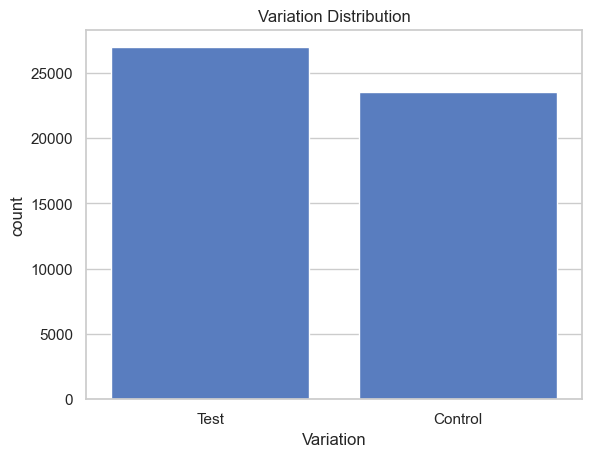

In [9]:
sns.countplot(data=df_merged, x="Variation")
plt.title("Variation Distribution")
plt.show()

In [10]:
df_final_web_data["date_time"] = pd.to_datetime(df_final_web_data["date_time"])
df_final_web_data["Date"] = df_final_web_data["date_time"].dt.date
df_final_web_data["Time"] = df_final_web_data["date_time"].dt.time

In [11]:
df_final_web_data.head()  # Display the first few rows of the web data

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [12]:
df_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


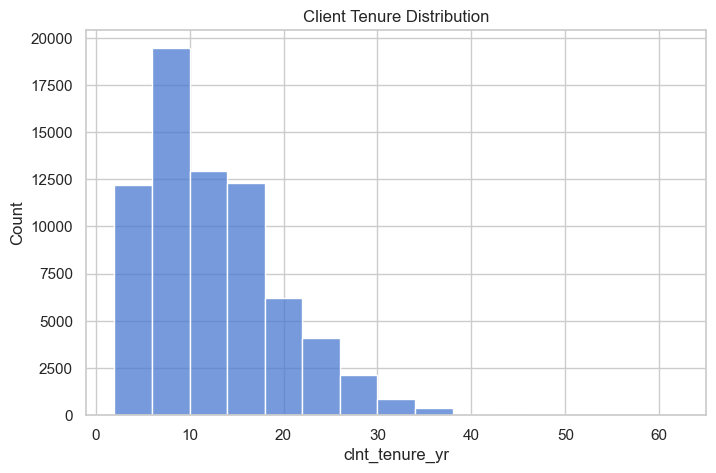

In [13]:
# Tenure (years with Vanguard)

plt.figure(figsize=(8,5))
sns.histplot(df_merged["clnt_tenure_yr"], bins=15, kde=False)
plt.title("Client Tenure Distribution")
plt.show()

In [20]:
### Who are the primary clients using this online process?

df_merged["tenure_category"] = np.where(df_merged["clnt_tenure_yr"] < 5, "New", "Long-standing")
df_merged["tenure_category"].value_counts()

tenure_category
Long-standing    65392
New               5217
Name: count, dtype: int64

In [21]:
### the primary clients are the long-standing, older clients from about 45+ 
### although their are new clients in 20 - 35 range

In [15]:
df_merged.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Long-standing
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Long-standing
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Long-standing
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Long-standing
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Long-standing


In [16]:
df_final_web_data.head(10)  # Display the first few rows of the web data

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,2017-04-17,15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01,2017-04-17,15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22,2017-04-17,15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,2017-04-05,13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,2017-04-05,13:09:43


In [18]:
completed_clients = df_final_web_data[df_final_web_data["process_step"]=="confirm"]["client_id"].unique()
df_merged["completed"] = df_merged["client_id"].isin(completed_clients).astype(int)

completion_rate = df_merged.groupby("client_id")["completed"].mean()
completion_rate

client_id
169        1.0
555        1.0
647        1.0
722        1.0
934        0.0
          ... 
9999400    1.0
9999626    0.0
9999729    1.0
9999832    0.0
9999839    1.0
Name: completed, Length: 70609, dtype: float64

In [24]:
df_final_web_data.head()

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04


In [27]:
df_final_web_data = df_final_web_data.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [32]:
df_final_web_data['process_step'].isnull().any()

np.False_

In [50]:
### extract the number from process_step - extract digits (if any)
df_final_web_data['step_num'] = df_final_web_data['process_step'].str.extract('(\d+)')

### handle string step: start = 0, confirm = 4
df_final_web_data.loc[df_final_web_data['process_step'] == 'start', 'step_num'] = 0
df_final_web_data.loc[df_final_web_data['process_step'] == 'confirm', 'step_num'] = 4

### convert safely to nullable integer
df_final_web_data['step_num'] = pd.to_numeric(df_final_web_data['step_num'], errors='coerce').astype('Int64')

### put in order by client_id, visit_id, date_time 
df_final_web_data = df_final_web_data.sort_values(by=['client_id', 'visit_id', 'date_time'])

### find and flag backward movements as errors
df_final_web_data['error_flag'] = (
    df_final_web_data
    .groupby(['client_id', 'visit_id'])['step_num']
    .diff()
    .apply(lambda x: 1 if x < 0 else 0)
)

df_final_web_data

### 1 = error, backwards step
### 0 = no error, forward or same step

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,0,0
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,1,0
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,2,0
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,3,0
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,4,0
...,...,...,...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,2017-06-01,22:40:08,1,0
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,2017-06-01,22:41:28,1,0
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,2017-06-01,22:41:47,2,0
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,2017-06-01,22:44:58,3,0


In [65]:
df_final_web_data['error_flag'].value_counts()

error_flag
0    692445
1     62960
Name: count, dtype: int64

In [66]:
### calculating the error rate

error_rate = df_final_web_data['error_flag'].mean() * 100
print(error_rate)

8.334601968480484


In [67]:
### merging the two dataframes to 'df_combined'

df_combined = pd.merge(
    df_final_web_data,
    df_merged,
    on='client_id',
    how='left'
)

In [68]:
df_combined.head()

,client_id,visitor_id,visit_id,process_step,date_time,Date,Time,step_num,error_flag,time_spent,...,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,tenure_category,completed
0,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,2017-04-12,20:19:36,0,0,0 days 00:00:09,...,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0
1,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,2017-04-12,20:19:45,1,0,0 days 00:00:46,...,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0
2,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,2017-04-12,20:20:31,2,0,0 days 00:01:34,...,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0
3,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,2017-04-12,20:22:05,3,0,0 days 00:01:04,...,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0
4,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,2017-04-12,20:23:09,4,0,NaT,...,262.0,47.5,M,2.0,501570.72,4.0,4.0,NaN,Long-standing,1.0


In [69]:
df_combined.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Date', 'Time', 'step_num', 'error_flag', 'time_spent',
       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation', 'tenure_category',
       'completed'],
      dtype='object')